In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm, beta

import sys
sys.path.append('../')
from pyEM.fitting import EMfit
from pyEM.math import norm2beta, norm2alpha, alpha2norm, beta2norm
from pyEM import plotting
from pyEM.classes import EMModel
import rw_models

In [3]:
# Define parameter names and ranges
param_names = ['beta', 'lr']
betamin, betamax = 0.75, 9
alphamin, alphamax = 0.05, 0.95

# Number of subjects
nsubjects = 150

# Generate cluster assignments (4 clusters)
cluster_size = nsubjects // 4

# Initialize parameters array
sim_params = np.ones((nsubjects, 2))

# Generate parameters for each cluster
# Cluster 1: Low beta, Low lr
sim_params[:cluster_size, 0] = np.clip(norm.rvs(1.75, scale=0.8, size=cluster_size), betamin, betamax)
sim_params[:cluster_size, 1] = np.clip(norm.rvs(0.2, scale=0.1, size=cluster_size), alphamin, alphamax)

# Cluster 2: High beta, Low lr
sim_params[cluster_size:2*cluster_size, 0] = np.clip(norm.rvs(7.0, scale=1.0, size=cluster_size), betamin, betamax)
sim_params[cluster_size:2*cluster_size, 1] = np.clip(norm.rvs(0.2, scale=0.1, size=cluster_size), alphamin, alphamax)

# Cluster 3: Low beta, High lr
sim_params[2*cluster_size:3*cluster_size, 0] = np.clip(norm.rvs(1.75, scale=0.8, size=cluster_size), betamin, betamax)
sim_params[2*cluster_size:3*cluster_size, 1] = np.clip(norm.rvs(0.7, scale=0.1, size=cluster_size), alphamin, alphamax)

# Cluster 4: High beta, High lr
sim_params[3*cluster_size:, 0] = np.clip(norm.rvs(7.0, scale=1.0, size=nsubjects - 3*cluster_size), betamin, betamax)
sim_params[3*cluster_size:, 1] = np.clip(norm.rvs(0.7, scale=0.1, size=nsubjects - 3*cluster_size), alphamin, alphamax)

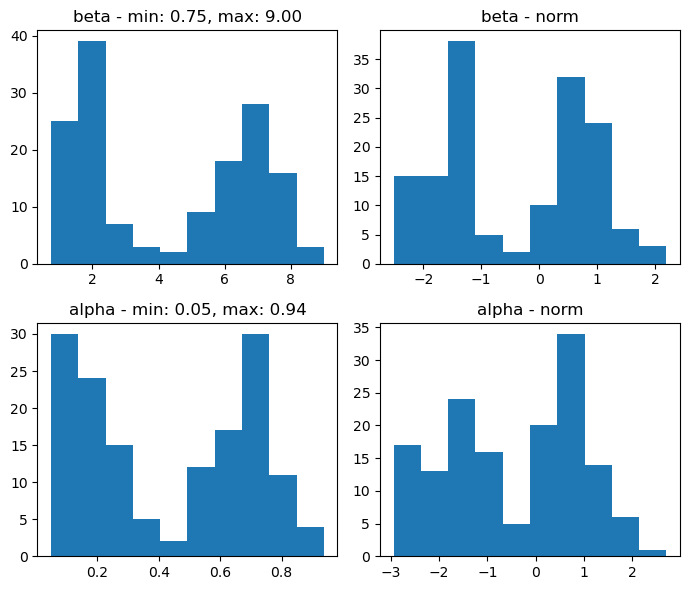

In [4]:
# plot 2 x 2
plt.figure(figsize=(7, 6))
plt.subplot(221)
plt.hist(sim_params[:,0]);
plt.title(f'beta - min: {min(sim_params[:,0]):.2f}, max: {max(sim_params[:,0]):.2f}');

plt.subplot(222)
plt.hist(beta2norm(sim_params[:,0]));
plt.title(f'beta - norm');

plt.subplot(223)
plt.hist(sim_params[:,1]);
plt.title(f'alpha - min: {min(sim_params[:,1]):.2f}, max: {max(sim_params[:,1]):.2f}');

plt.subplot(224)
plt.hist(alpha2norm(sim_params[:,1]));
plt.title(f'alpha - norm');

plt.tight_layout()

In [5]:
# simulate behavior and create a list of lists with choices/rewards per subject
subj_dict = rw_models.simulate(params=sim_params, nblocks=6, ntrials=24)

all_data = []
for idx, (choices, rewards) in enumerate(zip(subj_dict['choices'], subj_dict['rewards'])):
    all_data += [[choices, rewards]]

In [6]:
# Initialize the model class
RWModel = EMModel(all_data=all_data,
                  objfunc=rw_models.fit,
                  param_names=param_names)

# Fit the model
RWModel.EMfit(mstep_maxit=100)

11430.216 (000), 10032.304 (001), 9960.399 (002), 9946.414 (003), 9942.083 (004), 9940.359 (005), 9939.464 (006), 9938.843 (007), 9938.515 (008), 9938.387 (009), 9938.269 (010), 9938.204 (011), 9938.119 (012), 9938.035 (014), 9938.014 (015), 9937.953 (017), 9937.937 (018), 9937.934 (019), 9937.819 (030),  -- CONVERGED!!!!!


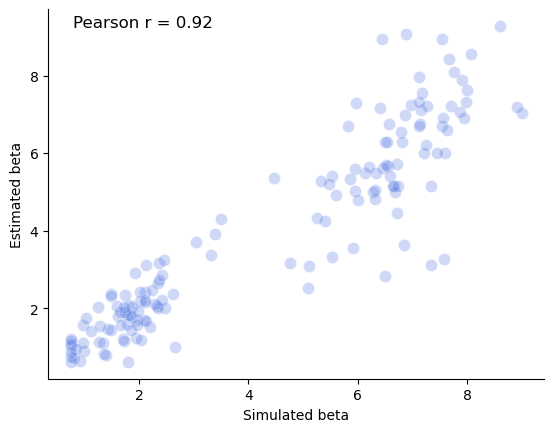

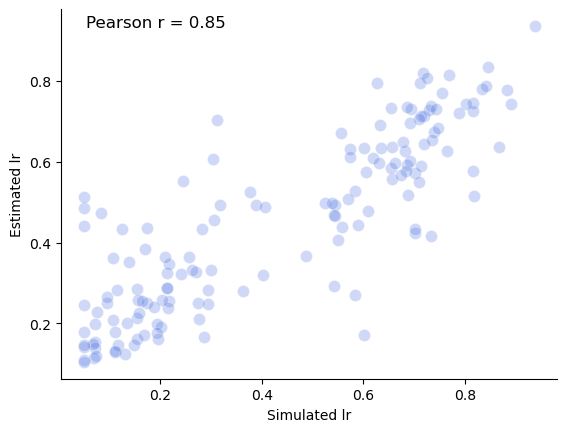

In [7]:
# Get subject-wise model fit information
RWModel.get_fits()

# Plot the parameter recovery
for param_idx, param_label in enumerate(RWModel.param_names):
    simulated_param = sim_params[:,param_idx]
    fitted_params = RWModel.est_params[:,param_idx]
    plotting.plot_scatter(simulated_param, f'Simulated {param_label}', 
                          fitted_params, f'Estimated {param_label}')

In [8]:
# Calculate BIC
RWModel.calc_BICint(nll_output='CHOICE_NLL')
print(f'Integrated BIC: {RWModel.BICint}')

Integrated BIC: 19880.83471936365


In [9]:
# Calculate LME
RWModel.calc_LME()
print(f'LME: {RWModel.LME}')

Good Hessians: 150 out of 150
LME: -9959.405953117654
